# Лабораторная работа №2.1

## Опыт Франка-Герца.

In [1]:
from matplotlib.pyplot import show
from scipy.signal import argrelextrema
import pandas as pd
import numpy as np

### Constants

In [2]:
lenght = 12.8
width = 9.6

energies = []

### Functions.

In [3]:
def visualize_data_from_csv(table, x_col, y_col):
    
    table.plot(x=x_col, y=y_col, figsize=(lenght, width), grid=True,
             xlim=(table[x_col].min(), table[x_col].max()), color='b')

    show()

In [4]:
def find_distance_between_extremes(csv_table, xlabel, ylabel, comp):
    
    yvals = csv_table[ylabel].to_numpy()
    xvals = csv_table[xlabel].to_numpy()
    
    extr_ind = argrelextrema(yvals, comp)
    
    xextr = [xvals[i] for i in extr_ind][0]
    
    return xextr[1] - xextr[0]

### Первая таблица. V  = 2В.

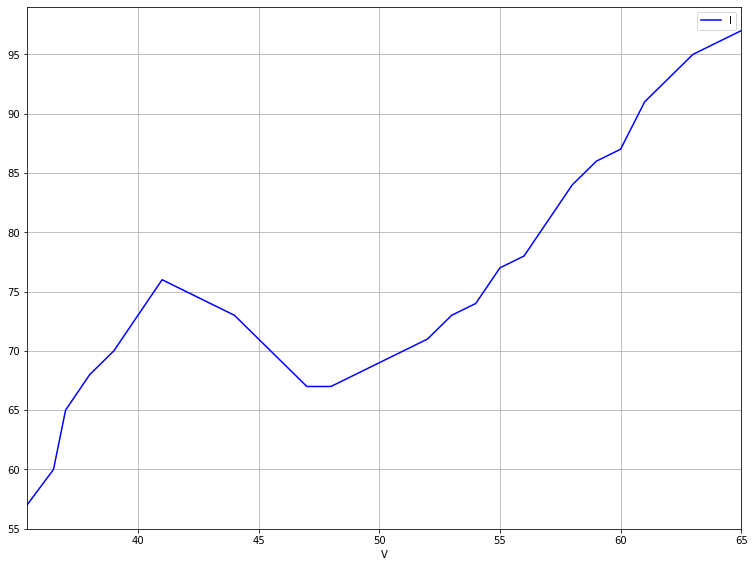

In [5]:
table = pd.read_csv('2v.csv', sep=';')

visualize_data_from_csv(table, 'V', 'I')

In [6]:
delta_v = find_distance_between_extremes(table, 'V', 'I', np.greater_equal)

energies.append(delta_v)

$ E_{1} = 24 eV$

### Вторая таблица. V = 3В.

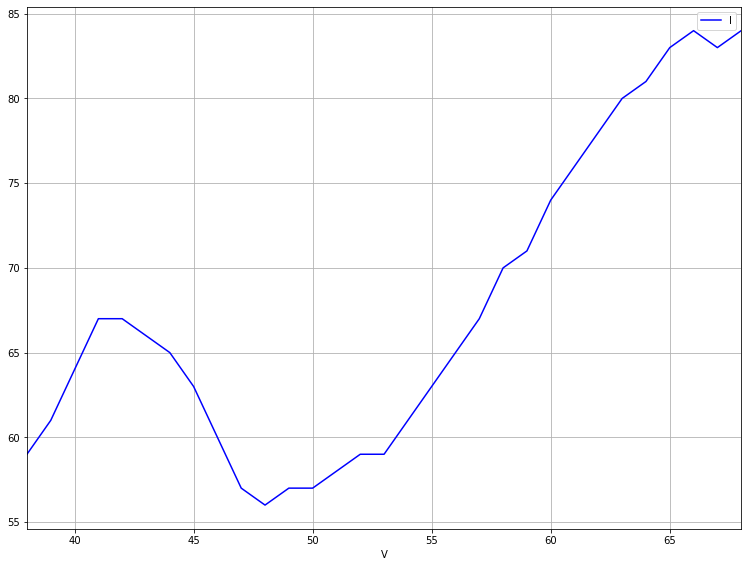

In [7]:
table = pd.read_csv('3v.csv', sep=';')

visualize_data_from_csv(table, 'V', 'I')

In [8]:
delta_v = find_distance_between_extremes(table, 'V', 'I', np.less)

energies.append(delta_v)

$ E_{1} = 19 eV$

### Третья таблица. V = 4В.

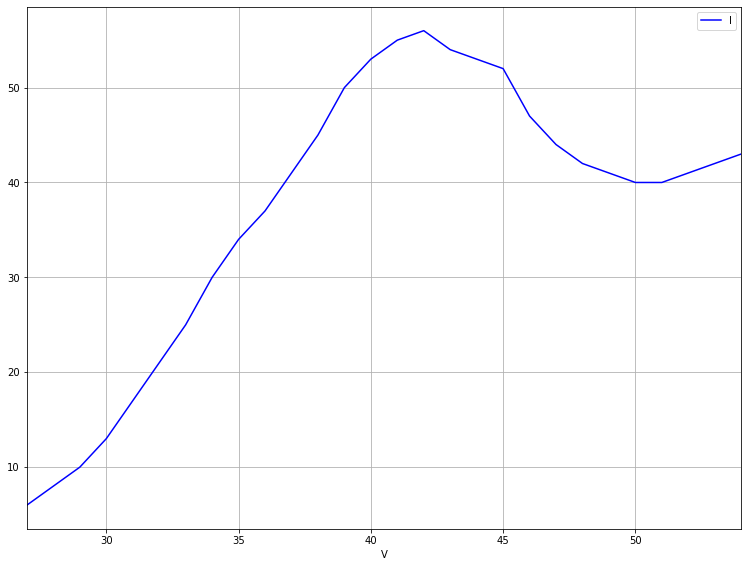

In [9]:
table = pd.read_csv('4v.csv', sep=';')

visualize_data_from_csv(table, 'V', 'I')

In [10]:
delta_v = find_distance_between_extremes(table, 'V', 'I', np.less_equal)

energies.append(delta_v)

$ E_{1} = 23 eV$

**Теоретический расчёт**: $ E_{1} = 24.587eV$

### Расчёт среднеквадратичного отклонения. 

In [11]:
energies = np.array(energies)

print(np.std(energies), np.mean(energies), sep='\n')

2.160246899469287
22.0


$ M[E_{1}] = 22eV$

$ \sigma = \pm 2.16eV $